<a href="https://colab.research.google.com/github/Yuvasri1901/TNSDC---generative-ai/blob/main/AI_interior_design_assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

label the images

In [ ]:
import os
from pathlib import Path
import shutil
! mkdir dataset
# Path to your downloaded dataset
dataset_path = Path("/content/interior_design_dataset.zip")
! mkdir labeled_dataset

# Create a dictionary to map folder names to labels
label_map = {
    "Modern": 0,
    "Vintage": 1,
    "Minimalist": 2,
    # Add more labels as needed
}

mkdir: cannot create directory ‘labeled_dataset’: File exists


In [ ]:
import os
from pathlib import Path
import shutil

# Path to your downloaded dataset
dataset_path = Path("/content/interior_design_dataset.zip")

# Create a dictionary to map folder names to labels
label_map = {
    "Modern": 0,
    "Vintage": 1,
    "Minimalist": 2,
    # Add more labels as needed
}

# Path to the directory where labeled images will be saved
labeled_dataset_path = Path("/content/labeled_dataset")

# Extract the dataset
with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Iterate through the dataset folders
for folder_name in os.listdir("/content/dataset"):
    if folder_name in label_map:
        label = label_map[folder_name]
        folder_path = Path("/content/dataset") / folder_name
        # Iterate through images in the folder
        for image_name in os.listdir(folder_path):
            image_path = folder_path / image_name
            # Create a new folder for the label if it doesn't exist
            label_folder = labeled_dataset_path / str(label)
            label_folder.mkdir(parents=True, exist_ok=True)
            # Copy the image to the corresponding label folder
            shutil.copy(image_path, label_folder)

print("Images labeled and saved.")


In [ ]:
# Create a new directory for labeled dataset
labeled_dataset_path = Path("/content/labeled_dataset")
os.makedirs(labeled_dataset_path, exist_ok=True)

# Iterate through each subfolder (class) in the dataset
for folder_name in os.listdir("dataset"):
    if folder_name in label_map:
        label = label_map[folder_name]
        folder_path = "/content/archive.zip" / folder_name
        labeled_folder_path = labeled_dataset_path / folder_name
        os.makedirs(labeled_folder_path, exist_ok=True)

        # Copy images from original folder to the labeled folder with updated names
        for idx, image_name in enumerate(os.listdir(folder_path)):
            old_image_path = folder_path / image_name
            new_image_name = f"{label}_{idx}.jpg"  # Assign a new name with label
            new_image_path = labeled_folder_path / new_image_name
            shutil.copyfile(old_image_path, new_image_path)

print("Dataset labeling completed.")

Dataset labeling completed.


preprocess the labeled images

Found 0 images belonging to 0 classes.
0
32


IndexError: index 0 is out of bounds for axis 0 with size 0

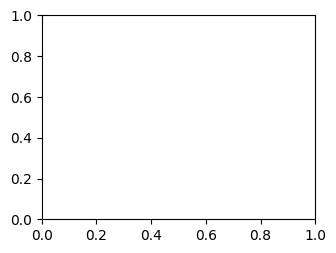

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the labeled dataset
labeled_dataset_path = Path("/content/labeled_dataset")

# Define the ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define batch size and image size
batch_size = 32
image_size = (256, 256)

# Create a generator for training data
train_generator = datagen.flow_from_directory(labeled_dataset_path,target_size=image_size,batch_size=batch_size,class_mode='categorical',shuffle=True)

print(len(train_generator))
!ls {labeled_dataset_path}
print(batch_size)
# Visualize a few preprocessed images
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {np.argmax(sample_labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
import os

# Path to the labeled zip dataset
zip_dataset_path = "/content/interior_design_dataset.zip"
extracted_path = "/content/labeled_dataset"

# Extract the zip file
with ZipFile(zip_dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Now, define the path to the extracted dataset
extracted_dataset_path = os.path.join(extracted_path, "labeled_dataset")

# Define the ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define batch size and image size
batch_size = 32
image_size = (256, 256)

# Create a generator for training data
train_generator = datagen.flow_from_directory(
    extracted_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

print(len(train_generator))
print(os.listdir(extracted_dataset_path))
print(batch_size)

# Visualize a few preprocessed images
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {np.argmax(sample_labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/labeled_dataset/labeled_dataset'

In [ ]:
print(f"Number of images: {len(sample_images)}")
print(f"Number of labels: {len(sample_labels)}")
if len(sample_images) == 0 or len(sample_labels) == 0:
    print("Error: The sample_images and sample_labels variables are empty.")
print(train_generator)
print(f"Batch size: {train_generator.batch_size}")
print(f"Target size: {train_generator.target_size}")
print(f"Class mode: {train_generator.class_mode}")
print(f"Shuffle: {train_generator.shuffle}")
print(labeled_dataset_path)

Number of images: 0
Number of labels: 0
Error: The sample_images and sample_labels variables are empty.
Batch size: 16
Target size: (256, 256)
Class mode: categorical
Shuffle: True
/content/labeled_dataset


In [ ]:
!ls {extracted_dataset_path}


ls: cannot access '/content/labeled_dataset/labeled_dataset': No such file or directory


Found 0 images belonging to 0 classes.


IndexError: index 0 is out of bounds for axis 0 with size 0

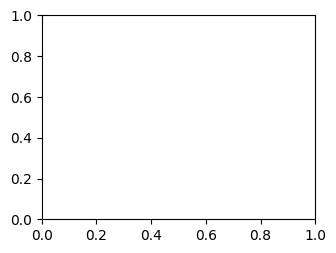

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the labeled dataset
labeled_dataset_path = Path("/content/labeled_dataset")

# Define the ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define batch size and image size
batch_size = 16  # Reduced the batch size to 16
image_size = (256, 256)

# Create a generator for training data
train_generator = datagen.flow_from_directory(labeled_dataset_path,target_size=image_size,batch_size=batch_size,class_mode='categorical',shuffle=True)

# Visualize a few preprocessed images
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {np.argmax(sample_labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the labeled dataset
labeled_dataset_path = Path("/content/labeled_dataset")

# Define the ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define batch size and image size
batch_size = 32
image_size = (256, 256)

# Create a generator for training data
train_generator = datagen.flow_from_directory(labeled_dataset_path,target_size=image_size,batch_size=batch_size,class_mode='categorical',shuffle=True)

# Print the length of the train_generator
print(f"Length of train_generator: {len(train_generator)}")

# Print the batch_size and target_size
print(f"Batch size: {batch_size}")


Found 0 images belonging to 0 classes.
Length of train_generator: 0
Batch size: 32


In [ ]:
!pip install Pillow



create a basic interface that allows users to input room dimensions, upload images, select style preferences, specify budget constraints, and interact with design suggestions.

In [ ]:
!apt-get install -y xauth
!xauth add :0 . trusted



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xauth is already the newest version (1:1.1-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
xauth:  file /root/.Xauthority does not exist
xauth: (argv):1:  key contains odd number of or non-hex characters


In [ ]:
!pip install tkinter
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk

# Function to handle image upload
def upload_image():
    global image_path
    image_path = filedialog.askopenfilename()
    if image_path:
        image = Image.open(image_path)
        image = image.resize((250, 250), Image.ANTIALIAS)
        image = ImageTk.PhotoImage(image)
        image_label.config(image=image)
        image_label.image = image
    else:
        messagebox.showerror("Error", "No image selected.")

# Function to handle design suggestions
def get_design_suggestions():
    # Placeholder function for AI design suggestions
    messagebox.showinfo("Design Suggestions", "Here are some design suggestions based on your preferences.")

# Create the main window
window = tk.Tk()
window.title("AI Interior Design Assistant")

# Room Dimensions
room_label = tk.Label(window, text="Enter Room Dimensions:")
room_label.pack()

length_label = tk.Label(window, text="Length (ft):")
length_label.pack()
length_entry = tk.Entry(window)
length_entry.pack()

width_label = tk.Label(window, text="Width (ft):")
width_label.pack()
width_entry = tk.Entry(window)
width_entry.pack()

# Image Upload
image_label = tk.Label(window, text="Upload Room Image:")
image_label.pack()

upload_button = tk.Button(window, text="Upload Image", command=upload_image)
upload_button.pack()

# Style Preferences
style_label = tk.Label(window, text="Select Style Preference:")
style_label.pack()

style_options = ["Modern", "Vintage", "Minimalist", "Rustic"]
style_var = tk.StringVar(window)
style_var.set(style_options[0])  # Default option

style_menu = tk.OptionMenu(window, style_var, *style_options)
style_menu.pack()

# Budget Constraints
budget_label = tk.Label(window, text="Specify Budget ($):")
budget_label.pack()

budget_entry = tk.Entry(window)
budget_entry.pack()

# Button to Get Design Suggestions
suggestions_button = tk.Button(window, text="Get Design Suggestions", command=get_design_suggestions)
suggestions_button.pack()

# Run the Tkinter event loop
window.mainloop()


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


TclError: no display name and no $DISPLAY environment variable

install TensorFlow and Keras using pip

In [ ]:
pip install tensorflow keras


define and train a basic CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Adjust num_classes based on your dataset
    ])
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Assuming images are resized to 256x256 pixels
num_classes = 4  # For example: Modern, Vintage, Minimalist, Rustic

# Create an instance of the CNN model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

 prepare the dataset.Use the labeled dataset created earlier

In [ ]:
# Path to the labeled dataset
labeled_dataset_path = "/content/labeled_dataset"

# Create ImageDataGenerator for preprocessing and loading data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2
)

# Create the training and validation data generators
batch_size = 32
train_generator = datagen.flow_from_directory(
    labeled_dataset_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    labeled_dataset_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


train the CNN model

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)


ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.

Once the model is trained, use it to predict the style of uploaded images

In [ ]:
def predict_style(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.

    prediction = model.predict(img_array)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    style_mapping = {
        0: "Modern",
        1: "Vintage",
        2: "Minimalist",
        3: "Rustic"
    }

    predicted_style = style_mapping[predicted_class]
    return predicted_style

# Example usage
image_path = "path_to_your_uploaded_image.jpg"
predicted_style = predict_style(image_path)
print("Predicted Style:", predicted_style)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_uploaded_image.jpg'

**Generator Network:**
The generator takes random noise as input and generates new design layouts.

**Discriminator Network:**
The discriminator evaluates whether an input design is real (from the dataset) or fake (generated by the generator).

**GAN Model:**
The GAN combines the generator and discriminator into a single model. The goal is to train the generator to fool the discriminator into classifying its generated designs as real.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the Generator Network
def build_generator(latent_dim):
    input_layer = Input(shape=(latent_dim,))
    x = Dense(128 * 16 * 16, activation='relu')(input_layer)
    x = Reshape((16, 16, 128))(x)
    x = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    output_layer = Conv2DTranspose(3, kernel_size=3, strides=1, padding='same', activation='sigmoid')(x)

    model = Model(input_layer, output_layer)
    return model

# Define the Discriminator Network
def build_discriminator(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(input_layer)
    x = Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Flatten()(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(input_layer, output_layer)
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    model = Model(gan_input, gan_output)
    return model

# Define constants
latent_dim = 100  # Dimension of the latent space
input_shape = (256, 256, 3)  # Image dimensions

# Build and compile the models
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape)

generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Print model summaries
generator.summary()
discriminator.summary()
gan.summary()


ValueError: Exception encountered when calling layer "model_1" (type Functional).

Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 65536, but received input with shape (None, 16384)

Call arguments received by layer "model_1" (type Functional):
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=None
  • mask=None

define functions for training the GAN

In [ ]:
def train_gan(generator, discriminator, gan, dataset, latent_dim, epochs, batch_size):
    for epoch in range(epochs):
        for batch in dataset:
            # Train Discriminator
            noise = tf.random.normal([batch_size, latent_dim])
            fake_images = generator.predict(noise)
            real_images = batch

            combined_images = np.concatenate([real_images, fake_images])
            labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            labels += 0.05 * np.random.random(labels.shape)

            d_loss = discriminator.train_on_batch(combined_images, labels)

            # Train Generator
            noise = tf.random.normal([batch_size, latent_dim])
            misleading_labels = np.ones((batch_size, 1))

            g_loss = gan.train_on_batch(noise, misleading_labels)

        print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Train the GAN
epochs = 50
batch_size = 32

# Path to your labeled dataset
labeled_dataset_path = "path_to_your_labeled_dataset"

# Create ImageDataGenerator for loading data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
dataset = datagen.flow_from_directory(
    labeled_dataset_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode=None
)

# Train the GAN
train_gan(generator, discriminator, gan, dataset, latent_dim, epochs, batch_size)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_labeled_dataset'

use the trained generator to generate new design layouts

In [ ]:
def generate_designs(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_designs = generator.predict(noise)
    return generated_designs

# Generate new designs
num_samples = 5
generated_designs = generate_designs(generator, latent_dim, num_samples)

# Visualize the generated designs
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_designs[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
